# Import the necessary libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Read the DataFrames from CSV files

In [2]:
# Load the datasets
Negative_tweets = pd.read_csv("/kaggle/input/preprocessed-twitter-tweets/processedNegative.csv", header=None)
Positive_tweets = pd.read_csv("/kaggle/input/preprocessed-twitter-tweets/processedPositive.csv", header=None)
Neutral_tweets = pd.read_csv("/kaggle/input/preprocessed-twitter-tweets/processedNeutral.csv", header=None)

# Transform Data 

In [3]:
# Transpose the DataFrames to have tweets in rows
Negative_tweets = Negative_tweets.T
Positive_tweets = Positive_tweets.T
Neutral_tweets = Neutral_tweets.T

# Check the shapes and contents of the DataFrames
print("Negative_tweets shape:", Negative_tweets.shape)

print("Positive_tweets shape:", Positive_tweets.shape)

print("Neutral_tweets shape:", Neutral_tweets.shape)

# Assign column names if each DataFrame has only one column
if Negative_tweets.shape[1] == 1:
    Negative_tweets.columns = ['tweet']
if Positive_tweets.shape[1] == 1:
    Positive_tweets.columns = ['tweet']
if Neutral_tweets.shape[1] == 1:
    Neutral_tweets.columns = ['tweet']

# Label the tweets: Negative = -1, Positive = 1, Neutral = 0
Negative_tweets['label'] = -1
Positive_tweets['label'] = 1
Neutral_tweets['label'] = 0

Negative_tweets shape: (1117, 1)
Positive_tweets shape: (1186, 1)
Neutral_tweets shape: (1570, 1)


# Describe All data

Combined DataFrame shape: (3873, 2)

Sample tweets:
                                                   tweet  label
1189  Excited about event next week in Bangalore!  c...      1
1962                  That would be a great trick happy      1
3744                        When commandos get homesick      0
2801                                         and more.       0
2509                        Leander and Mahesh get away      0

Negative tweet sample: How unhappy  some dogs like it though
Positive tweet sample: An inspiration in all aspects: Fashion
Neutral tweet sample: Pak PM survives removal scare


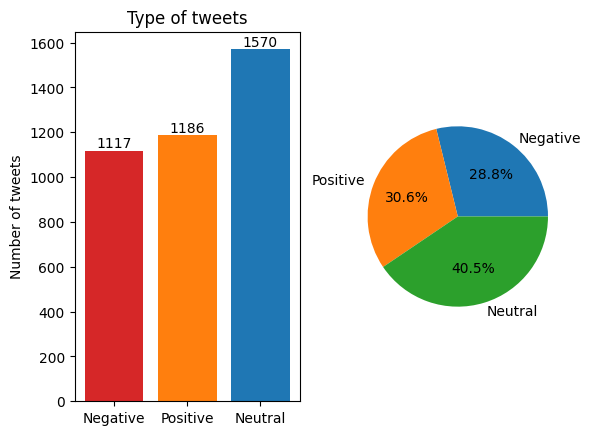

In [4]:
# Concatenate all tweets into a single DataFrame
all_tweets = pd.concat([Negative_tweets, Positive_tweets, Neutral_tweets], ignore_index=True)

# Display some sample tweets and the shape of the combined DataFrame
print("Combined DataFrame shape:", all_tweets.shape, end="\n\n")
print("Sample tweets:\n", all_tweets.sample(5), end="\n\n")

# Plotting the counts of each type of tweet
counts = [len(Negative_tweets), len(Positive_tweets), len(Neutral_tweets)]
print("Negative tweet sample:", Negative_tweets['tweet'].iloc[0])
print("Positive tweet sample:", Positive_tweets['tweet'].iloc[0])
print("Neutral tweet sample:", Neutral_tweets['tweet'].iloc[0])

fig, (ax1, ax2) = plt.subplots(1, 2)
bar_colors = ['tab:red', 'tab:orange', 'tab:blue']
bar_labels = ['Negative', 'Positive', 'Neutral']

hbars = ax1.bar(bar_labels, counts, label=bar_labels, color=bar_colors)
ax1.bar_label(hbars, fmt='%.d')
ax1.set_ylabel('Number of tweets')
ax1.set_title('Type of tweets')

ax2.pie(counts, labels=bar_labels, autopct='%1.1f%%')
plt.show()

In [5]:
all_tweets.describe()
all_tweets["label"].value_counts()

label
 0    1570
 1    1186
-1    1117
Name: count, dtype: int64

In [6]:
all_tweets.columns

Index(['tweet', 'label'], dtype='object')

# Data Preprocessing

In [10]:
#Libraries of NLTK
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

E0000 00:00:1729123469.998179      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1017 00:04:30.006326795      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1017 00:04:30.006341272      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1017 00:04:30.006344467      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1017 00:04:30.006346899      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1017 00:04:30.006349312      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

ModuleNotFoundError: No module named 'nltk'

In [ ]:
#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords 
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

In [ ]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
#     text=lemmatization(text)
    return text

In [ ]:
all_tweets['tweet']=all_tweets['tweet'].apply(clean_text)

In [ ]:
all_tweets.tail()

## 1. Tokenization


In [ ]:
from nltk.tokenize import word_tokenize
all_tweets['tweet tokenization']=all_tweets['tweet'].apply(word_tokenize)

In [ ]:
all_tweets.tail()

## 2. Stemming


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def word_stemmer(words):
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

all_tweets['tweet tokenization stemming']=all_tweets['tweet tokenization'].apply(word_stemmer)

In [ ]:
all_tweets.tail()

## 3. Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

!python -m nltk.downloader wordnet
!python -m nltk.downloader omw-1.4
!python -m nltk.downloader averaged_perceptron_tagger

In [ ]:
!unzip  /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
lemmatizer = WordNetLemmatizer()

wnl = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if not recognized

def word_lemmatize(words):
    # POS tag the words
    pos_tagged = nltk.pos_tag(words)
    stemmed_words = [wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word,tag in pos_tagged]
    return stemmed_words

all_tweets['tweet tokenization lemmatization']=all_tweets['tweet tokenization'].apply(word_lemmatize)

In [ ]:
print(all_tweets.iloc[1]["tweet"])
print(all_tweets.iloc[1]["tweet tokenization"])
print(all_tweets.iloc[1]["tweet tokenization stemming"])
print(all_tweets.iloc[1]["tweet tokenization lemmatization"])

In [ ]:
all_tweets.tail()

## 4. Misspelings

In [ ]:
!pip install pyspellchecker

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

# Initialize lemmatizer and spell checker
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if not recognized

# Lemmatize with spell correction
def lemmatize_with_spellcheck(word, pos_tag):
    # Correct the word first
    corrected_word = spell.correction(word)
    # Convert POS tag
    wordnet_pos = get_wordnet_pos(pos_tag)
    # Lemmatize the corrected word
    return lemmatizer.lemmatize(corrected_word, pos=wordnet_pos)


def process(words):
    pos_tagged = nltk.pos_tag(words)
    
    lemma = []
    
    for word, tag in pos_tagged:
        lemma.append(lemmatize_with_spellcheck(word, tag))

    return lemma

In [ ]:
all_tweets['tweet tokenization misspellings']=all_tweets['tweet tokenization'].apply(process)

In [ ]:
all_tweets.tail()

In [ ]:
all_tweets.to_csv("/output.csv"")